In [1]:
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt


In [2]:
#read and load the graph from txt file
G = nx.read_edgelist("TERROR NET DATA.txt",create_using=nx.DiGraph(),nodetype=str)
G_undirected = nx.read_edgelist("TERROR NET DATA.txt",create_using=nx.Graph(),nodetype=str)
influent_list = {}

### Description of the dataset

In [3]:
desc = {"Name":["TERROR NET DATA.txt"],"Nr. nodes":[len(G.nodes)],"Nr. edges":[len(G.edges)],"Density":[nx.density(G)]}
desc_pd = pd.DataFrame(desc)
desc_pd

Name  Nr. nodes  Nr. edges   Density
0  TERROR NET DATA.txt       4275       7052  0.000386

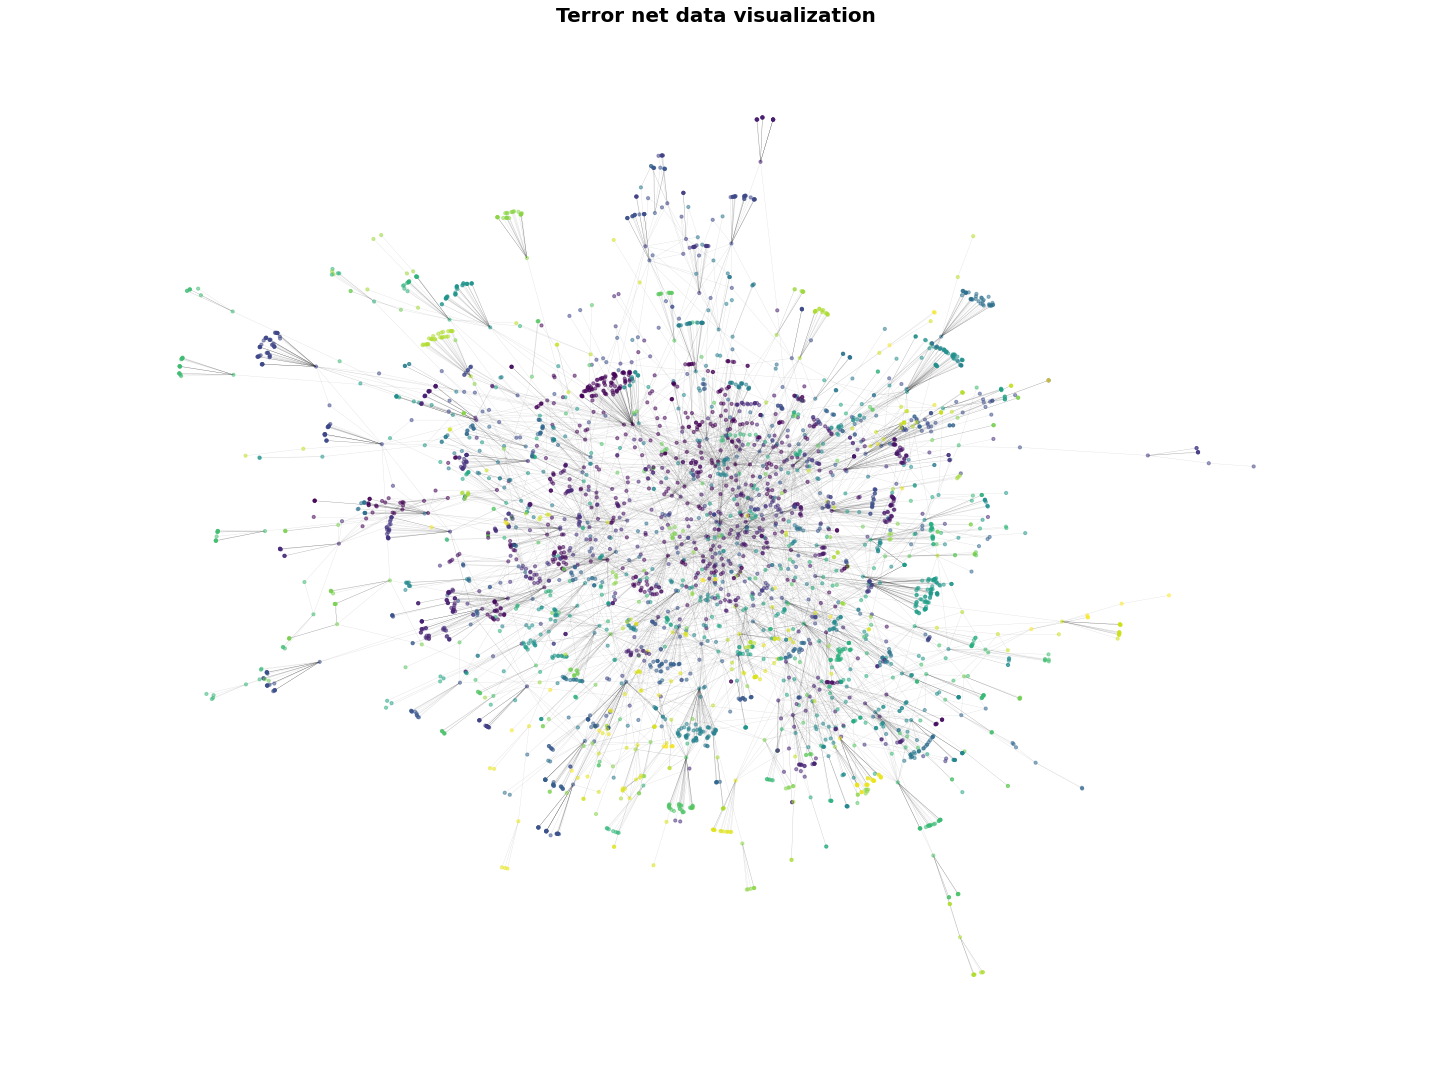

In [4]:
G_clone = G_undirected.copy()


components = nx.connected_components(G_clone)
largest_component = max(components, key=len)
H = G_clone.subgraph(largest_component)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos = nx.spring_layout(H, k=0.01, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
node_color = [community_index[n] for n in H]
node_size = [10 for v in H.nodes()]


nx.draw_networkx_nodes(
    H,
    node_size=node_size,
    pos=pos,
    node_color=node_color,
    alpha=0.5)
nx.draw_networkx_edges(
    H,
    pos=pos,
    edge_color="#000000",
    width=0.3,
    alpha=0.15)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Terror net data visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

#### Degree centrality

Centrality of nodes based on their degree, and the overall centralization of graphs.

In [5]:
deg_list = []

deg_centr_in = nx.in_degree_centrality(G)
deg_centr_in = sorted(deg_centr_in.items(),key=lambda x: x[1],reverse=True)
deg_centr_in_perc = dict(deg_centr_in[:10])
deg_centr_in_nr = dict((key,(len(G.nodes)-1)*el) for (key,el) in deg_centr_in_perc.items())



deg_centr_out = nx.out_degree_centrality(G)
deg_centr_out = sorted(deg_centr_out.items(),key=lambda x: x[1],reverse=True)
deg_centr_out_perc = dict(deg_centr_out[:10])
deg_centr_out_nr = dict((key,(len(G.nodes)-1)*el) for (key,el) in deg_centr_out_perc.items())

deg_centr = {"NodesIn":deg_centr_in_perc.keys(),"InDegree %":deg_centr_in_perc.values(),"InDegree Nr":deg_centr_in_nr.values(),
            "NodesOut":deg_centr_out_perc.keys(),"OutDegree %":deg_centr_out_perc.values(),"OutDegree Nr":deg_centr_out_nr.values()}
deg_centr_pd = pd.DataFrame(deg_centr)
print(deg_centr_pd)

[deg_list.append(el) for el in list(deg_centr_in_perc.keys())]
[deg_list.append(el) for el in list(deg_centr_out_perc.keys())]
for el in deg_list:
    influent_list[el] = "dg"


min_deg_out = deg_centr_out[len(deg_centr_out)-1]
min_deg_in = deg_centr_in[len(deg_centr_in)-1]

print("Min deegree in {min_deg_in}, min degree out {min_deg_out}".format(min_deg_in = min_deg_in,min_deg_out = min_deg_out))


  NodesIn  InDegree %  InDegree Nr NodesOut  OutDegree %  OutDegree Nr
0    P339    0.015676         67.0     P710     0.016846          72.0
1    P633    0.012167         52.0    P2302     0.015910          68.0
2   P3400    0.011231         48.0    P1451     0.015208          65.0
3    P312    0.009359         40.0     P339     0.012869          55.0
4    P165    0.008423         36.0     P750     0.012167          52.0
5    P139    0.008189         35.0    P2977     0.011699          50.0
6   P2479    0.007955         34.0     P410     0.011465          49.0
7    P811    0.007253         31.0    P3679     0.011465          49.0
8   P1798    0.007019         30.0      P91     0.010529          45.0
9   P1230    0.007019         30.0      P95     0.010295          44.0
Min deegree in ('P4464', 0.0), min degree out ('P4582', 0.0)


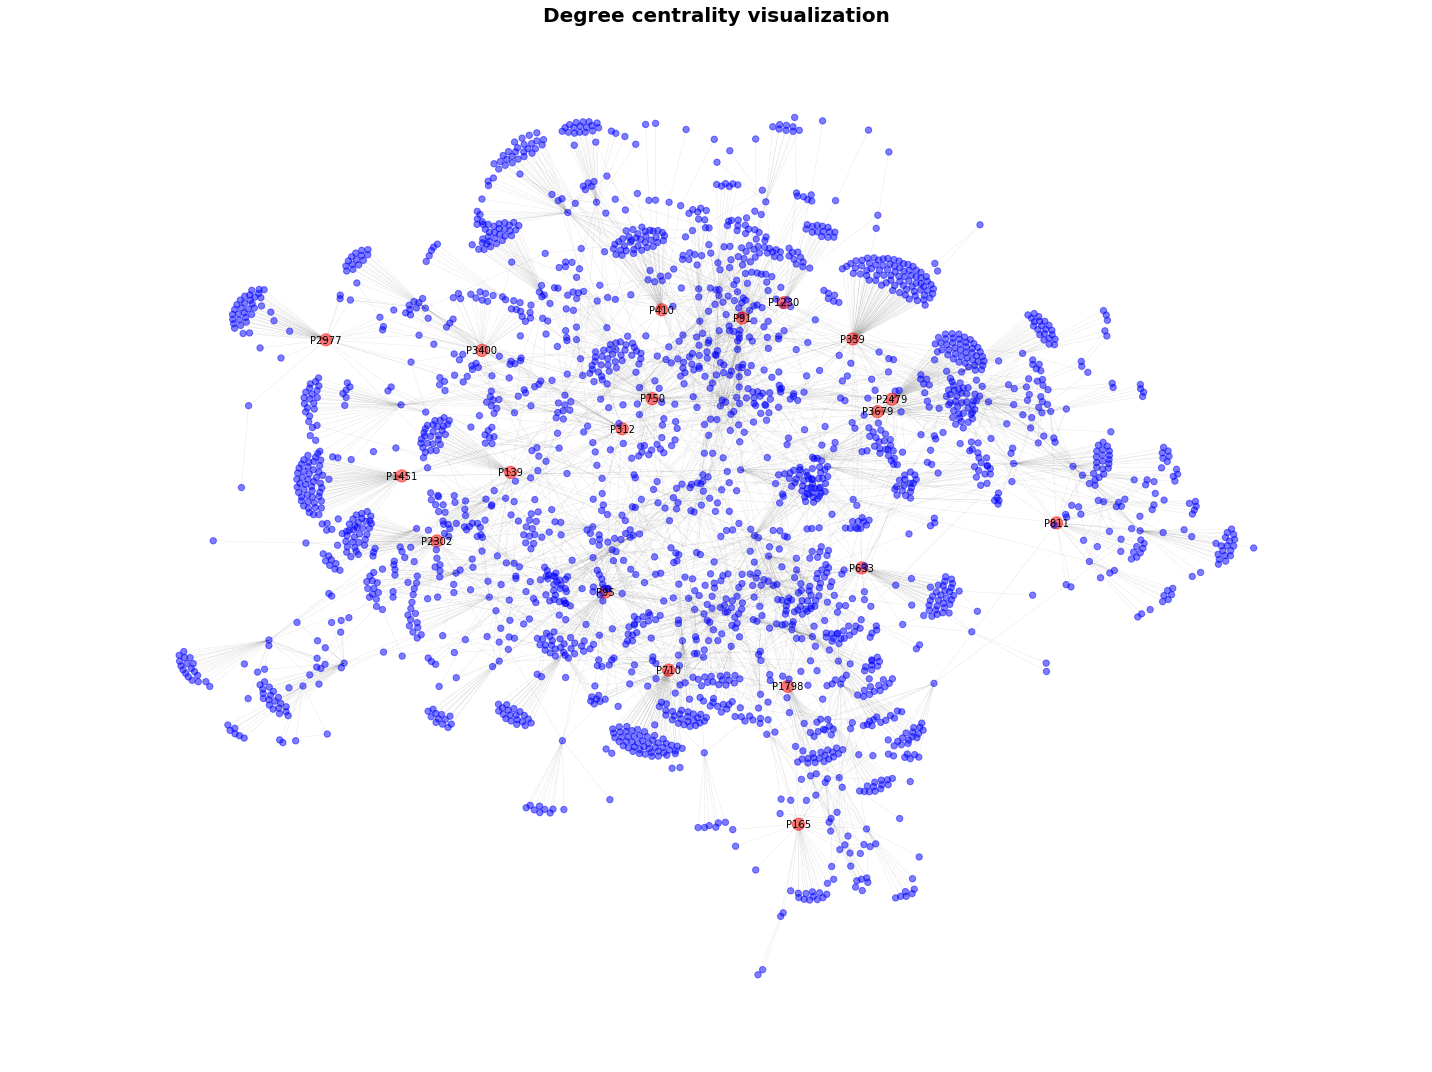

In [6]:

#Graph
subgraph_deg = []
labels = {}
node_color_deg = []
#get neigbohours
for (idx,el) in enumerate(deg_list):
    subgraph_deg.append(el)
    for x in G_undirected.neighbors(el):
        subgraph_deg.append(x)
        [subgraph_deg.append(x1) for x1 in G_undirected.neighbors(x)]
    # [subgraph_deg.append(x) for x in G_undirected.neighbors(el)]
H_deg = G_undirected.subgraph(subgraph_deg)
#get only necessary leables
for n in H_deg.nodes():
    if(n in deg_list):
        node_color_deg.append("red")
        labels[n] = n
    else:
        node_color_deg.append("blue")
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos = nx.spring_layout(H_deg, k=0.05, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
# node_color = [community_index[n] for n in H_deg]
node_size = [150 if v in deg_list else 40 for v in H_deg.nodes()]

nx.draw_networkx_nodes(
    H_deg,
    node_size=node_size,
    node_color=node_color_deg,
    pos=pos,
    alpha=0.5)
nx.draw_networkx_labels(H_deg,pos,font_size=10,labels=labels)
nx.draw_networkx_edges(
    H_deg,
    pos=pos,
    edge_color="#000000",
    width=0.3,
    alpha=0.15)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Degree centrality visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

#### Eigenvector centrality

Weighted degree centrality accounting for node degree and neigbohors degrees

In [7]:
eig_list = []

eig_centr = nx.eigenvector_centrality(G,weight=0.001)
eig_centr = sorted(eig_centr.items(),key=lambda x: x[1],reverse=True)
eig_centr_perc = dict(eig_centr[:10])

[eig_list.append(el) for el in list(eig_centr_perc.keys())]

eigen_centr = {"Nodes":eig_centr_perc.keys(),"Degree %":eig_centr_perc.values()}
eig_centr_pd = pd.DataFrame(eigen_centr)
eig_centr_pd



Nodes  Degree %
0    P4  0.322479
1  P338  0.279660
2  P335  0.269152
3   P30  0.257397
4  P355  0.241448
5  P533  0.219257
6  P891  0.201583
7  P334  0.190910
8  P436  0.165581
9   P78  0.165021

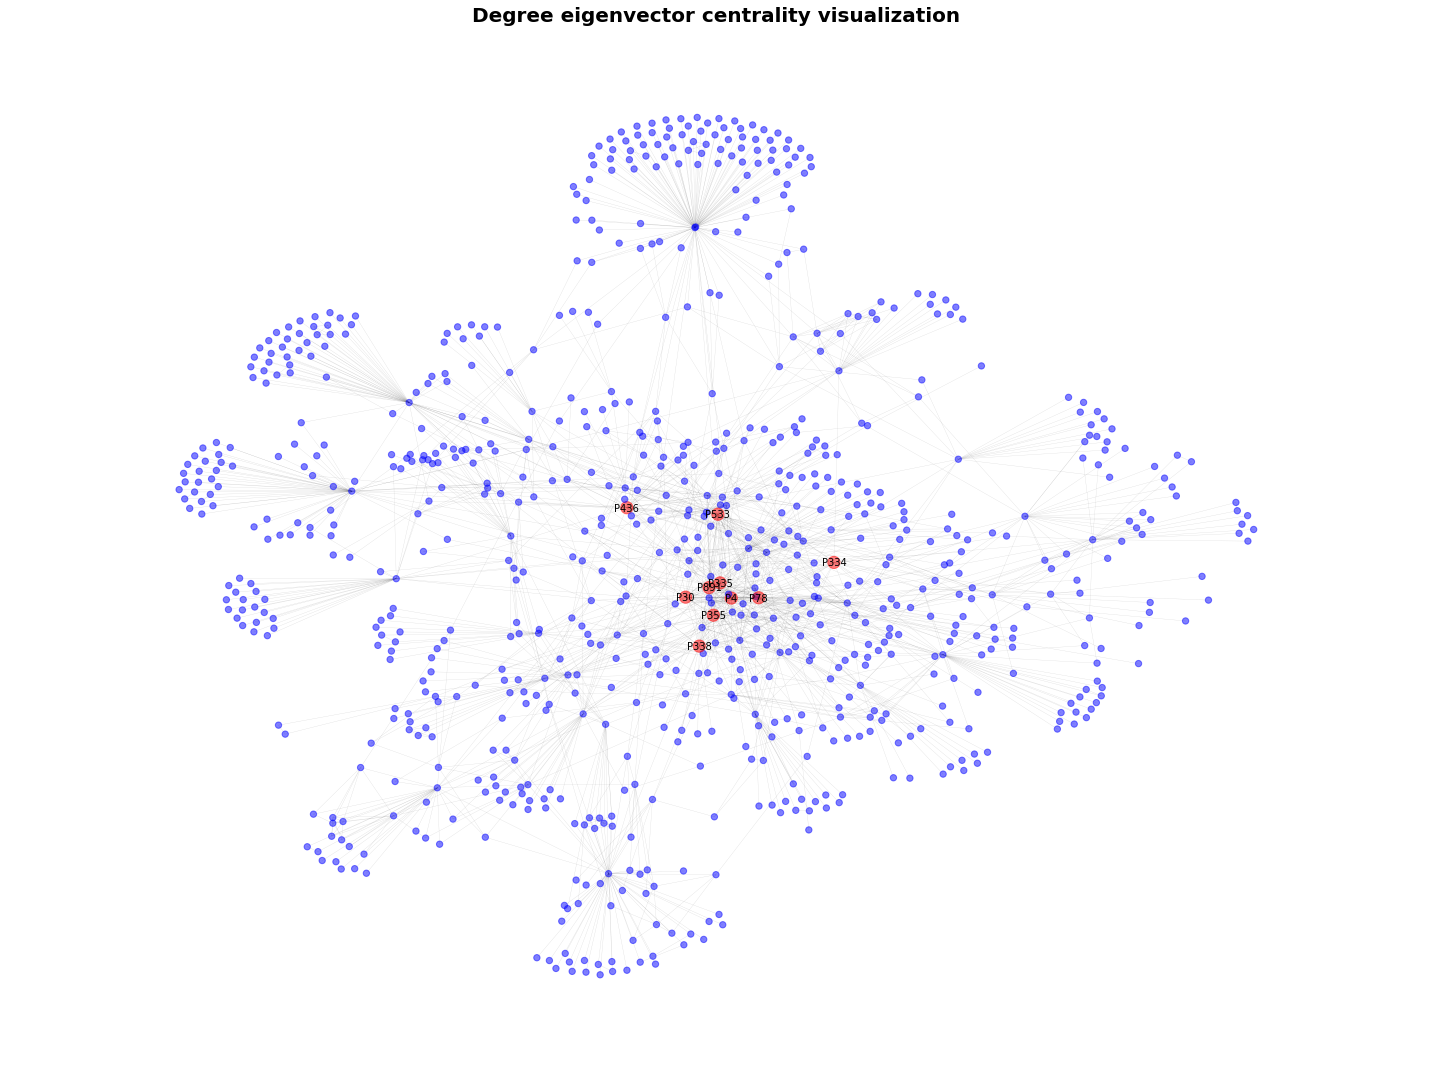

In [8]:
#Graph
subgraph_eig = []
labels_eig = {}
node_color_eig = []
#get neigbohours
for (idx,el) in enumerate(eig_list):
    subgraph_eig.append(el)
    for x in G_undirected.neighbors(el):
        subgraph_eig.append(x)
        [subgraph_eig.append(x1) for x1 in G_undirected.neighbors(x)]

H_eig = G_undirected.subgraph(subgraph_eig)
#get only necessary leables
for n in H_eig.nodes():
    if(n in eig_list):
        node_color_eig.append("red")
        labels_eig[n] = n
    else:
        node_color_eig.append("blue")
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos_eig = nx.spring_layout(H_eig, k=0.08, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
# node_color = [community_index[n] for n in H_deg]
node_size_eig = [150 if v in eig_list else 40 for v in H_eig.nodes()]

nx.draw_networkx_nodes(
    H_eig,
    node_size=node_size_eig,
    node_color=node_color_eig,
    pos=pos_eig,
    alpha=0.5)
nx.draw_networkx_labels(H_eig,pos_eig,font_size=10,labels=labels_eig)
nx.draw_networkx_edges(
    H_eig,
    pos=pos_eig,
    edge_color="#000000",
    width=0.3,
    alpha=0.15)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Degree eigenvector centrality visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

#### Closeness centrality


the distance of an node to all others in
the network by focusing on the distance from each node to all others

In [9]:
close_list = []

closeness = nx.closeness_centrality(G) #by default is normalized
closeness = sorted(closeness.items(),key=lambda x: x[1],reverse=True)
closeness = dict(closeness[:10])

[close_list.append(el) for el in list(closeness.keys())]

closeness_info = {"Nodes":closeness.keys(),"Closeness":closeness.values()}
closeness_pd = pd.DataFrame(closeness_info)

closeness_pd


Nodes  Closeness
0   P339   0.086849
1   P312   0.081667
2   P533   0.081206
3   P128   0.079343
4   P338   0.078550
5  P1230   0.078066
6   P334   0.077575
7   P190   0.077275
8   P541   0.077206
9   P495   0.075366

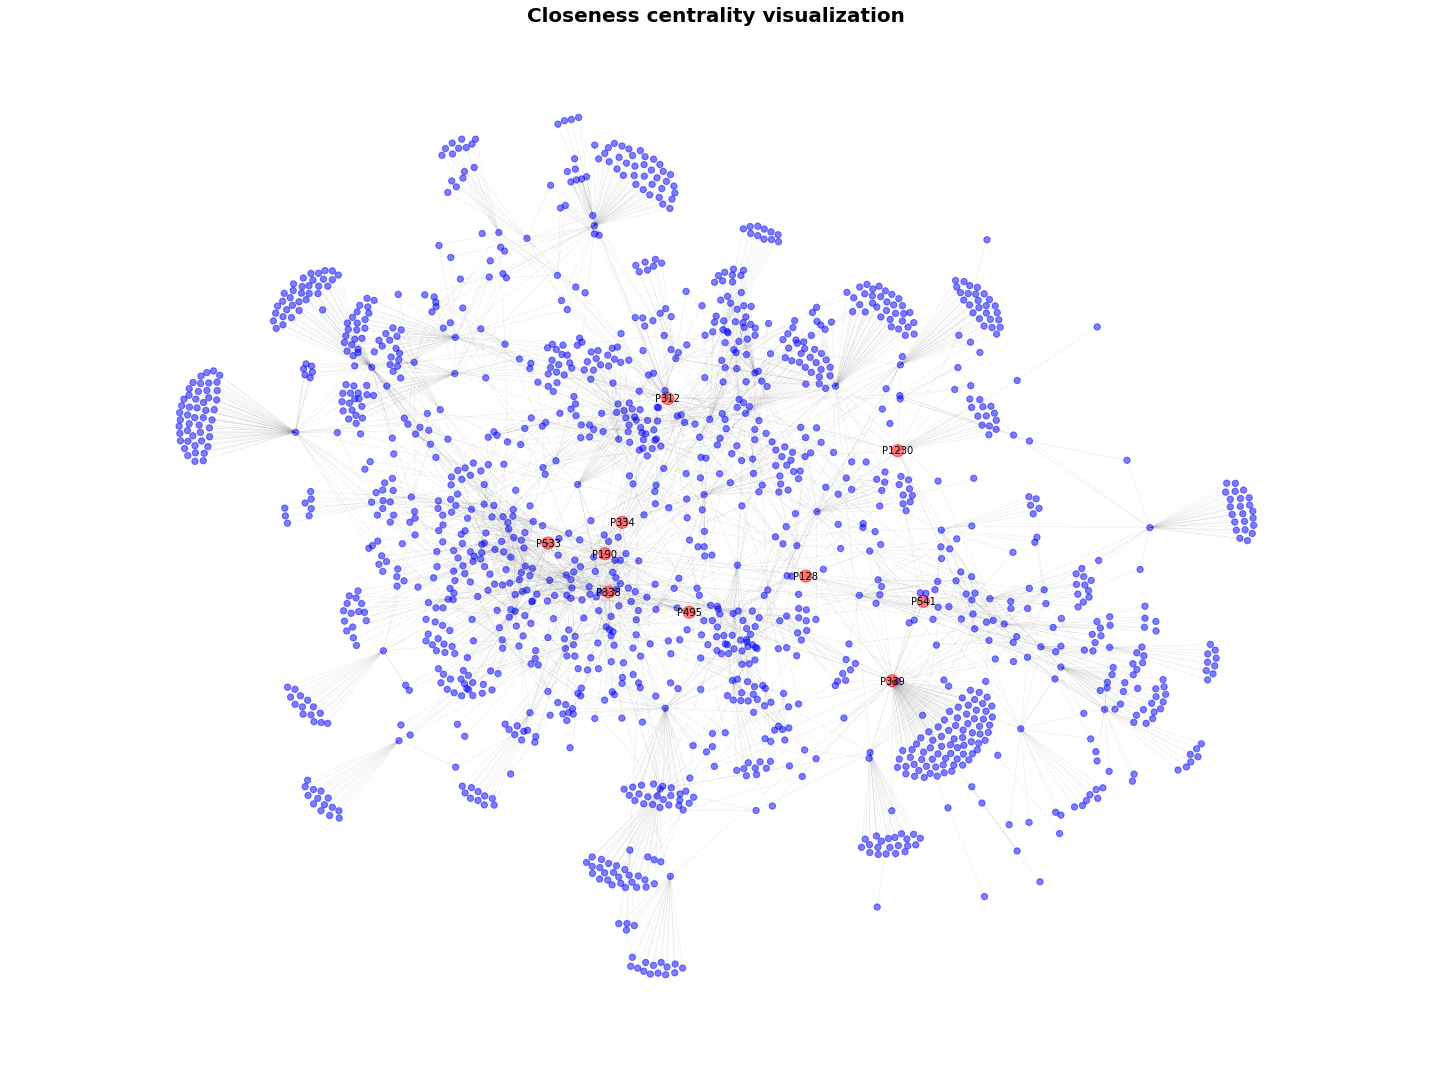

In [10]:
#Graph
subgraph_close = []
labels_close = {}
node_color_close = []
#get neigbohours
for (idx,el) in enumerate(close_list):
    subgraph_close.append(el)
    for x in G_undirected.neighbors(el):
        subgraph_close.append(x)
        [subgraph_close.append(x1) for x1 in G_undirected.neighbors(x)]

H_close = G_undirected.subgraph(subgraph_close)
#get only necessary leables
for n in H_close.nodes():
    if(n in close_list):
        node_color_close.append("red")
        labels_close[n] = n
    else:
        node_color_close.append("blue")
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos_close = nx.spring_layout(H_close, k=0.05, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
# node_color = [community_index[n] for n in H_deg]
node_size_close = [150 if v in close_list else 40 for v in H_close.nodes()]

nx.draw_networkx_nodes(
    H_close,
    node_size=node_size_close,
    node_color=node_color_close,
    pos=pos_close,
    alpha=0.5)
nx.draw_networkx_labels(H_close,pos_close,font_size=10,labels=labels_close)
nx.draw_networkx_edges(
    H_close,
    pos=pos_close,
    edge_color="#000000",
    width=0.3,
    alpha=0.15)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Closeness centrality visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

#### Betweeness

Frequency at which a point occurs on the shortest paths that connected pair of points. Number of times node is in a path between two other nodes.

In [11]:
bet_list = []

betweeness = nx.betweenness_centrality(G)
betweeness =  sorted(betweeness.items(),key=lambda x: x[1],reverse=True)
betweeness = dict(betweeness[:10])
[bet_list.append(el) for el in list(betweeness.keys())]


betweeness_info = {"Nodes":betweeness.keys(),"Betweeness":betweeness.values()}
betweeness_pd = pd.DataFrame(betweeness_info)

betweeness_pd



Nodes  Betweeness
0   P339    0.052518
1   P533    0.042171
2   P312    0.030897
3    P28    0.024328
4   P482    0.023721
5   P338    0.023321
6   P759    0.020999
7  P2302    0.019519
8  P1798    0.019323
9   P144    0.017373

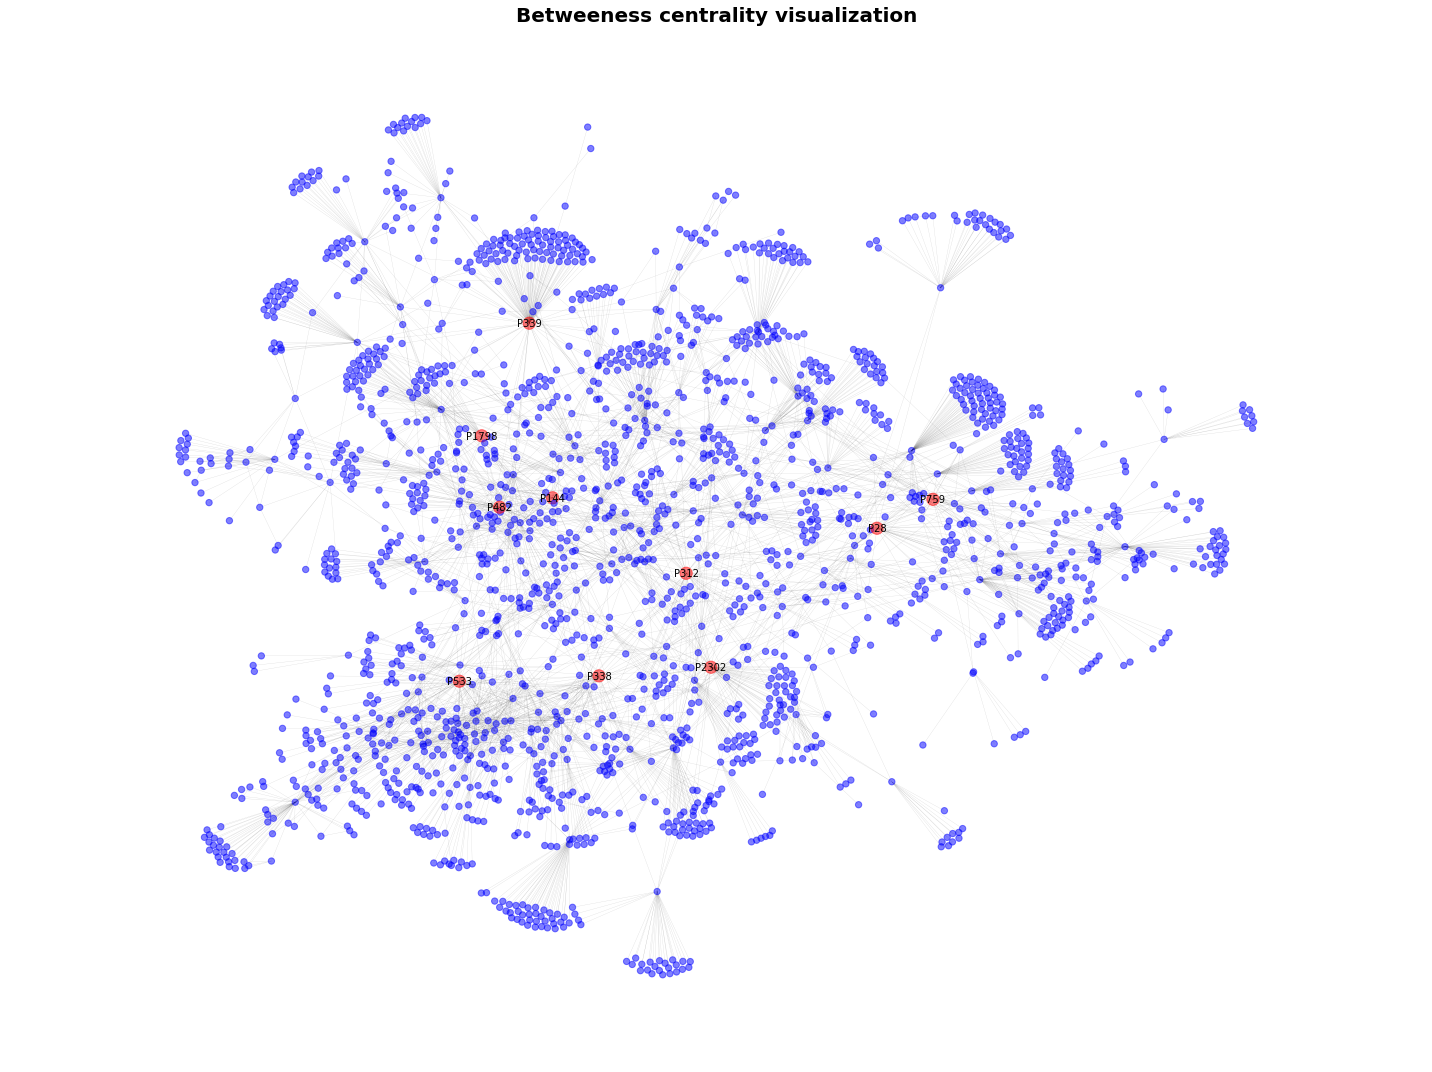

In [12]:
#Graph
subgraph_bet = []
labels_bet = {}
node_color_bet = []
#get neigbohours
for (idx,el) in enumerate(bet_list):
    subgraph_bet.append(el)
    for x in G_undirected.neighbors(el):
        subgraph_bet.append(x)
        [subgraph_bet.append(x1) for x1 in G_undirected.neighbors(x)]

H_bet = G_undirected.subgraph(subgraph_bet)
#get only necessary leables
for n in H_bet.nodes():
    if(n in bet_list):
        node_color_bet.append("red")
        labels_bet[n] = n
    else:
        node_color_bet.append("blue")
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos_bet = nx.spring_layout(H_bet, k=0.05, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
# node_color = [community_index[n] for n in H_deg]
node_size_bet = [150 if v in bet_list else 40 for v in H_bet.nodes()]

nx.draw_networkx_nodes(
    H_bet,
    node_size=node_size_bet,
    node_color=node_color_bet,
    pos=pos_bet,
    alpha=0.5)
nx.draw_networkx_labels(H_bet,pos_bet,font_size=10,labels=labels_bet)
nx.draw_networkx_edges(
    H_bet,
    pos=pos_bet,
    edge_color="#000000",
    width=0.3,
    alpha=0.15)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Betweeness centrality visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

Current-flow betweenness centrality for nodes.

In [13]:
flow_list = []

components = nx.connected_components(G_undirected)
largest_component = max(components, key=len)
G_largest = G_undirected.subgraph(largest_component)

flowness = nx.current_flow_betweenness_centrality(G_largest)
flowness =  sorted(flowness.items(),key=lambda x: x[1],reverse=True)
flowness = dict(flowness[:10])
[flow_list.append(el) for el in list(flowness.keys())]


flowness_info = {"Nodes":flowness.keys(),"Flow":flowness.values()}
flowness_pd = pd.DataFrame(flowness_info)

flowness_pd


<class 'networkx.utils.decorators.argmap'> compilation 53:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Nodes      Flow
0   P339  0.147934
1   P312  0.115784
2  P2302  0.094708
3   P750  0.087909
4   P633  0.079559
5    P95  0.078681
6   P759  0.074296
7   P410  0.072853
8   P482  0.071481
9   P710  0.069716

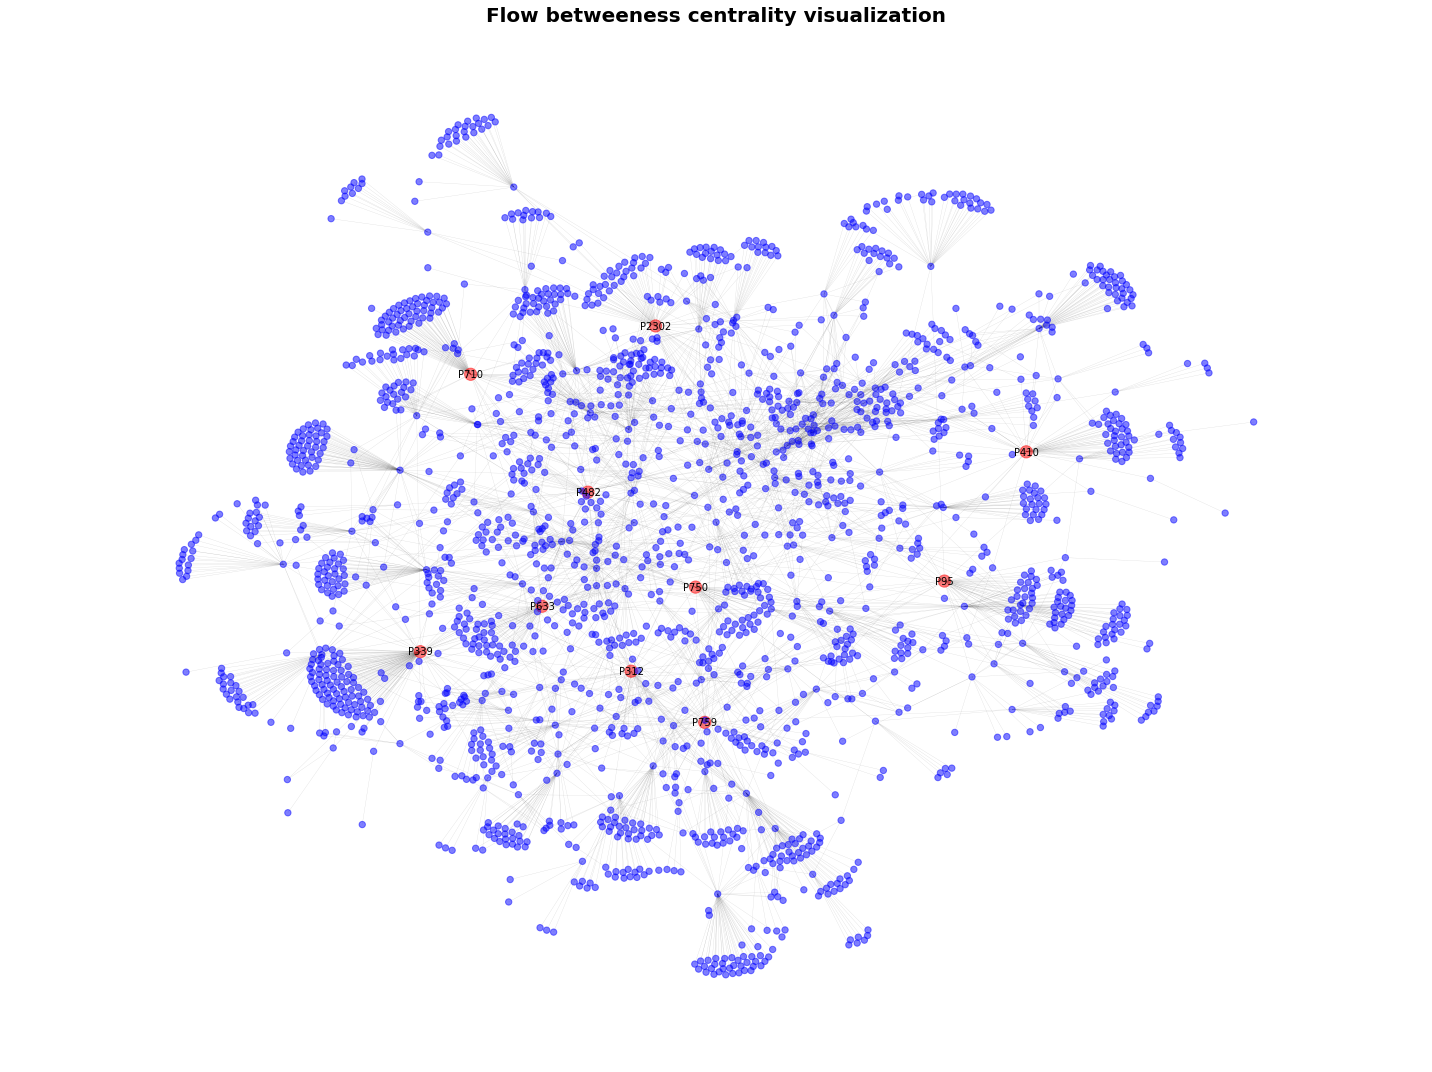

In [14]:
#Graph
subgraph_flow = []
labels_flow = {}
node_color_flow = []
#get neigbohours
for (idx,el) in enumerate(flow_list):
    subgraph_flow.append(el)
    for x in G_undirected.neighbors(el):
        subgraph_flow.append(x)
        [subgraph_flow.append(x1) for x1 in G_undirected.neighbors(x)]

H_flow = G_undirected.subgraph(subgraph_flow)
#get only necessary leables
for n in H_flow.nodes():
    if(n in flow_list):
        node_color_flow.append("red")
        labels_flow[n] = n
    else:
        node_color_flow.append("blue")
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos_flow = nx.spring_layout(H_flow, k=0.05, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
# node_color = [community_index[n] for n in H_deg]
node_size_flow = [150 if v in flow_list else 40 for v in H_flow.nodes()]

nx.draw_networkx_nodes(
    H_flow,
    node_size=node_size_flow,
    node_color=node_color_flow,
    pos=pos_flow,
    alpha=0.5)
nx.draw_networkx_labels(H_flow,pos_flow,font_size=10,labels=labels_flow)
nx.draw_networkx_edges(
    H_flow,
    pos=pos_flow,
    edge_color="#000000",
    width=0.3,
    alpha=0.15)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Flow betweeness centrality visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

### FInal graph consideration

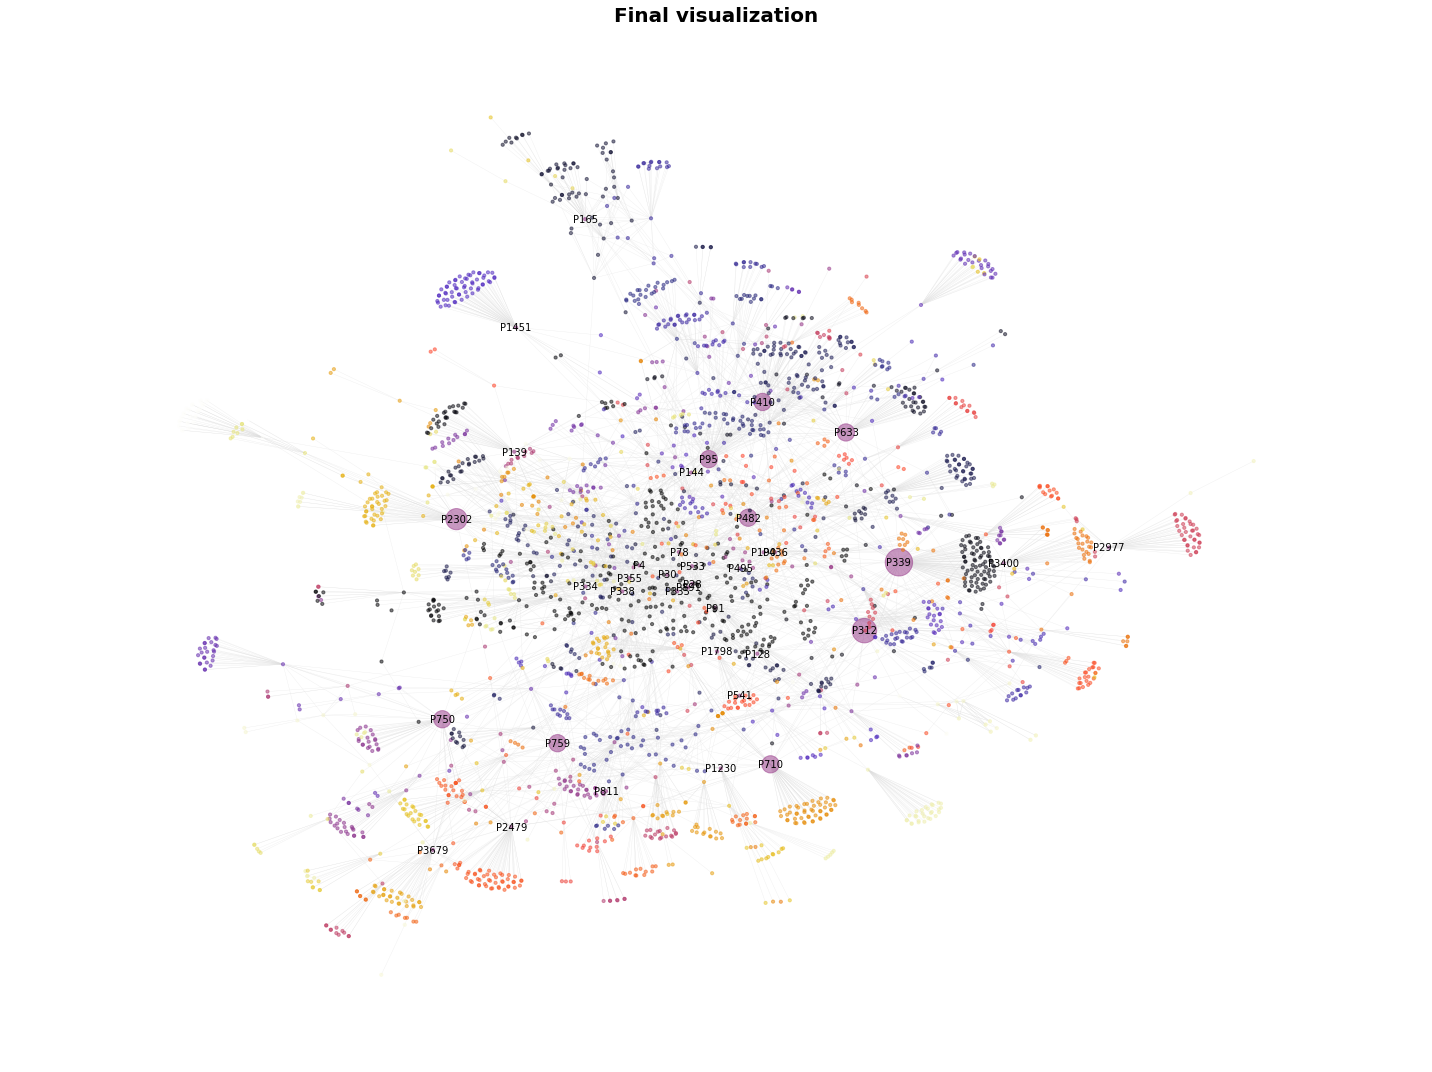

In [15]:
import matplotlib.pyplot as plt

total_infos = {}
#Degree
for el in deg_list:
    if(el not in total_infos.keys()):
        total_infos[el] = 1   
    else: 
        total_infos[el] += 1
#Eigenvector
for el in eig_list:
    if(el not in total_infos.keys()):
        total_infos[el] = 1   
    else: 
        total_infos[el] += 1
#Closeness
for el in close_list:
    if(el not in total_infos.keys()):
        total_infos[el] = 1   
    else: 
        total_infos[el] += 1
#Betweeness
for el in bet_list:
    if(el not in total_infos.keys()):
        total_infos[el] = 1   
    else: 
        total_infos[el] += 1
#Flown
for el in flow_list:
    if(el not in total_infos.keys()):
        total_infos[el] = 1   
    else: 
        total_infos[el] += 1


#Graph
subgraph_end = []
labels_end = {}
node_color_end = []
#get neigbohours
for (idx,el) in enumerate(total_infos):
    subgraph_end.append(el)
    for x in G_undirected.neighbors(el):
        subgraph_end.append(x)
        [subgraph_end.append(x1) for x1 in G_undirected.neighbors(x)]

H_end = G_undirected.subgraph(subgraph_end)

lpc = nx.community.label_propagation_communities(H_end)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#get only necessary leables
for n in H_end.nodes():
    if(n in total_infos):
        node_color_end.append("red")
        labels_end[n] = n
    else:
        node_color_end.append("blue")
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
# pos = nx.fruchterman_reingold_layout(G_clone,)
pos_end = nx.spring_layout(H_end, k=0.02, seed=8,dim=2)
# pos = nx.nx_agraph.graphviz_layout(G_clone)
# pos = nx.nx_pydot.pydot_layout(G_clone)
# pos = nx.kamada_kawai_layout(G_clone,scale=3)
# node_color = [community_index[n] for n in H_deg]
node_size_end = [150 * total_infos[v] if v in flow_list else 10 for v in H_end.nodes()]

node_color_end  = [100 if n in total_infos else  community_index[n] for n in H_end]

nx.draw_networkx_nodes(
    H_end,
    node_size=node_size_end,
    node_color=node_color_end,
    pos=pos_end,
    alpha=0.5,
    cmap=plt.cm.CMRmap)
nx.draw_networkx_labels(H_end,pos_end,font_size=10,labels=labels_end)
nx.draw_networkx_edges(
    H_end,
    pos=pos_end,
    edge_color="gainsboro",
    width=0.3,
    alpha=0.6)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Final visualization", font)
# Change font color for legend
font["color"] = "r"


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()
